## Compare Pearson and Spearman correlations

In grit, the user determines which similarity metric to use to compare profiles.
Here, we empirically compare Pearson and Spearman metrics to determine if either provides any benefit over the other.

In [1]:
import pathlib
import pandas as pd
import plotnine as gg

In [2]:
output_dir = pathlib.Path("figures")

# Load cell health grit scores
cell_health_dir = pathlib.Path("../../1.calculate-metrics/cell-health/results")
cell_health_grit_file = pathlib.Path(f"{cell_health_dir}/cell_health_grit.tsv")

cell_health_grit_df = pd.read_csv(cell_health_grit_file, sep="\t")
print(cell_health_grit_df.shape)
cell_health_grit_df.head()

(1428, 6)


,perturbation,group,grit,cell_line,barcode_control,cor_method
0,AKT1-1,AKT1,0.793952,HCC44,cutting_control,pearson
1,AKT1-2,AKT1,0.775840,HCC44,cutting_control,pearson
2,ARID1B-1,ARID1B,0.448876,HCC44,cutting_control,pearson
3,ARID1B-2,ARID1B,0.323462,HCC44,cutting_control,pearson
4,ATF4-1,ATF4,0.214374,HCC44,cutting_control,pearson


In [3]:
cor_metric_df = (
    cell_health_grit_df
    .pivot(
        index=["perturbation", "group", "cell_line", "barcode_control"],
        columns="cor_method",
        values="grit"
    )
    .reset_index()
)

cor_metric_df = (
    cor_metric_df.assign(differential=cor_metric_df.pearson-cor_metric_df.spearman)
)

print(cor_metric_df.shape)
cor_metric_df.head()

(714, 7)


cor_method,perturbation,group,cell_line,barcode_control,pearson,spearman,differential
0,AKT1-1,AKT1,A549,cutting_control,0.257727,0.219545,0.038182
1,AKT1-1,AKT1,A549,perturbation_control,0.327723,0.296689,0.031034
2,AKT1-1,AKT1,ES2,cutting_control,-0.052501,-0.090980,0.038480
3,AKT1-1,AKT1,ES2,perturbation_control,0.196828,0.166066,0.030762
4,AKT1-1,AKT1,HCC44,cutting_control,0.793952,0.760423,0.033529


/Users/gway/miniconda3/envs/grit-benchmark/lib/python3.9/site-packages/plotnine/ggplot.py:727: PlotnineWarning: Saving 5.4 x 3.2 in image.
/Users/gway/miniconda3/envs/grit-benchmark/lib/python3.9/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: figures/cell_health_grit_correlation_metric_comparison.png


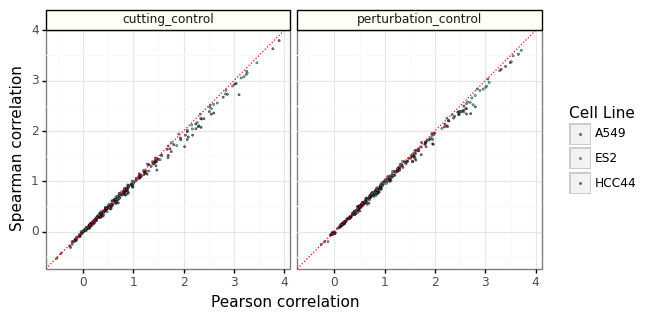

<ggplot: (400880625)>

In [4]:
cell_line_colors = {
  "A549": "#861613",
  "ES2": "#1CADA8",
  "HCC44": "#2A364D"
}

grit_cor_comparison_gg = (
    gg.ggplot(cor_metric_df.dropna(), gg.aes(x="pearson", y="spearman"))
    + gg.geom_point(gg.aes(fill="cell_line"), size=0.7, stroke=0.2, alpha=0.7)
    + gg.facet_wrap("~barcode_control")
    + gg.geom_abline(intercept=0, slope=1, linetype="dotted", color="red")
    + gg.scale_fill_manual(name="Cell Line", values=cell_line_colors)
    + gg.xlab("Pearson correlation")
    + gg.ylab("Spearman correlation")
    + gg.coord_fixed()
    + gg.theme_bw()
    + gg.theme(strip_background=gg.element_rect(color="black", fill="#fdfff4"))
)

output_file = pathlib.Path(f"{output_dir}/cell_health_grit_correlation_metric_comparison.png")
grit_cor_comparison_gg.save(output_file, dpi=500, height=3.2, width=5.4)

grit_cor_comparison_gg